<a href="https://colab.research.google.com/github/sanjulikasharma/IPL_Score_Prediction/blob/main/IPL_Score_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

In [ ]:
ipl = pd.read_csv('ipl_data.csv')
print(ipl.head())

   mid        date                  venue               bat_team  \
0    1  2008-04-18  M Chinnaswamy Stadium  Kolkata Knight Riders   
1    1  2008-04-18  M Chinnaswamy Stadium  Kolkata Knight Riders   
2    1  2008-04-18  M Chinnaswamy Stadium  Kolkata Knight Riders   
3    1  2008-04-18  M Chinnaswamy Stadium  Kolkata Knight Riders   
4    1  2008-04-18  M Chinnaswamy Stadium  Kolkata Knight Riders   

                     bowl_team      batsman   bowler  runs  wickets  overs  \
0  Royal Challengers Bangalore   SC Ganguly  P Kumar     1        0    0.1   
1  Royal Challengers Bangalore  BB McCullum  P Kumar     1        0    0.2   
2  Royal Challengers Bangalore  BB McCullum  P Kumar     2        0    0.2   
3  Royal Challengers Bangalore  BB McCullum  P Kumar     2        0    0.3   
4  Royal Challengers Bangalore  BB McCullum  P Kumar     2        0    0.4   

   runs_last_5  wickets_last_5  striker  non-striker  total  
0            1               0        0            0    222 

In [ ]:
ipl.tail()

,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
76009,617,2017-05-21,"Rajiv Gandhi International Stadium, Uppal",Mumbai Indians,Rising Pune Supergiant,KH Pandya,DT Christian,121,7,19.2,40,0,40,12,129
76010,617,2017-05-21,"Rajiv Gandhi International Stadium, Uppal",Mumbai Indians,Rising Pune Supergiant,KH Pandya,DT Christian,127,7,19.3,46,0,46,12,129
76011,617,2017-05-21,"Rajiv Gandhi International Stadium, Uppal",Mumbai Indians,Rising Pune Supergiant,KH Pandya,DT Christian,128,7,19.4,47,0,47,12,129
76012,617,2017-05-21,"Rajiv Gandhi International Stadium, Uppal",Mumbai Indians,Rising Pune Supergiant,MG Johnson,DT Christian,129,7,19.5,48,0,47,13,129
76013,617,2017-05-21,"Rajiv Gandhi International Stadium, Uppal",Mumbai Indians,Rising Pune Supergiant,KH Pandya,DT Christian,129,8,19.6,47,1,47,13,129


Data Preprocessing


In [ ]:
df = ipl.drop(['date', 'runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5','mid', 'striker', 'non-striker'], axis =1)

In [ ]:
df.head()

,venue,bat_team,bowl_team,batsman,bowler,total
0,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,222
1,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,222
2,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,222
3,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,222
4,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,222


In [ ]:
df.columns

Index(['venue', 'bat_team', 'bowl_team', 'batsman', 'bowler', 'total'], dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76014 entries, 0 to 76013
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   venue      76014 non-null  object
 1   bat_team   76014 non-null  object
 2   bowl_team  76014 non-null  object
 3   batsman    76014 non-null  object
 4   bowler     76014 non-null  object
 5   total      76014 non-null  int64 
dtypes: int64(1), object(5)
memory usage: 3.5+ MB


In [ ]:
df.head()

,venue,bat_team,bowl_team,batsman,bowler,total
0,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,222
1,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,222
2,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,222
3,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,222
4,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,222


In [ ]:
X = df.drop(['total'], axis =1)
y = df['total']

In [ ]:
#Label Encoding

from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object for each categorical feature
venue_encoder = LabelEncoder()
batting_team_encoder = LabelEncoder()
bowling_team_encoder = LabelEncoder()
striker_encoder = LabelEncoder()
bowler_encoder = LabelEncoder()

# Fit and transform the categorical features with label encoding
X['venue'] = venue_encoder.fit_transform(X['venue'])
X['bat_team'] = batting_team_encoder.fit_transform(X['bat_team'])
X['bowl_team'] = bowling_team_encoder.fit_transform(X['bowl_team'])
X['batsman'] = striker_encoder.fit_transform(X['batsman'])
X['bowler'] = bowler_encoder.fit_transform(X['bowler'])

# You can also store the mapping of labels to original values
venue_mapping = dict(zip(venue_encoder.classes_, venue_encoder.transform(venue_encoder.classes_)))
batting_team_mapping = dict(zip(batting_team_encoder.classes_, batting_team_encoder.transform(batting_team_encoder.classes_)))
bowling_team_mapping = dict(zip(bowling_team_encoder.classes_, bowling_team_encoder.transform(bowling_team_encoder.classes_)))
striker_mapping = dict(zip(striker_encoder.classes_, striker_encoder.transform(striker_encoder.classes_)))
bowler_mapping = dict(zip(bowler_encoder.classes_, bowler_encoder.transform(bowler_encoder.classes_)))

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# Fit the scaler on the training data and transform both training and testing data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
import keras


In [ ]:
import tensorflow as tf


In [ ]:
# Define the neural network model
model = keras.Sequential([
    keras.layers.Input( shape=(X_train_scaled.shape[1],)),  # Input layer
    keras.layers.Dense(512, activation='relu'),  # Hidden layer with 64 units and ReLU activation
    keras.layers.Dense(216, activation='relu'),  # Hidden layer with 32 units and ReLU activation
    #keras.layers.Dense(32, activation='linear'),
    keras.layers.Dense(1, activation='linear')  # Output layer with linear activation for regression
])



In [ ]:
# Compile the model with Huber loss
huber_loss = tf.keras.losses.Huber(delta=1.0)  # You can adjust the 'delta' parameter as needed
model.compile(optimizer='adam', loss=huber_loss)  # Use Huber loss for regression

In [ ]:


# Train the model
model.fit(X_train_scaled, y_train, epochs=50, batch_size=64, validation_data=(X_test_scaled, y_test))


Epoch 1/50
832/832 [==============================] - 5s 5ms/step - loss: 31.8645 - val_loss: 22.1601
Epoch 2/50
832/832 [==============================] - 6s 7ms/step - loss: 22.3567 - val_loss: 21.9864
Epoch 3/50
832/832 [==============================] - 5s 6ms/step - loss: 22.3391 - val_loss: 22.4509
Epoch 4/50
832/832 [==============================] - 6s 8ms/step - loss: 22.2749 - val_loss: 22.1639
Epoch 5/50
832/832 [==============================] - 6s 7ms/step - loss: 22.2750 - val_loss: 22.0822
Epoch 6/50
832/832 [==============================] - 5s 6ms/step - loss: 22.1916 - val_loss: 21.8602
Epoch 7/50
832/832 [==============================] - 6s 8ms/step - loss: 22.1872 - val_loss: 22.0164
Epoch 8/50
832/832 [==============================] - 3s 4ms/step - loss: 22.2194 - val_loss: 21.9412
Epoch 9/50
832/832 [==============================] - 3s 4ms/step - loss: 22.1629 - val_loss: 21.9818
Epoch 10/50
832/832 [==============================] - 3s 4ms/step - loss: 22.1175

<Axes: >

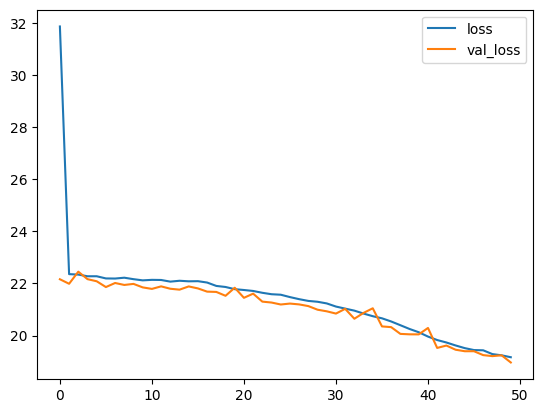

In [ ]:
model_losses = pd.DataFrame(model.history.history)
model_losses.plot()

In [ ]:
# Make predictions
predictions = model.predict(X_test_scaled)
predictions

713/713 [==============================] - 1s 1ms/step


array([[156.15721],
       [173.60957],
       [159.72063],
       ...,
       [149.4493 ],
       [154.01523],
       [167.69716]], dtype=float32)

In [ ]:
sample = pd.DataFrame(predictions,columns=['Predict'])
sample['Actual']=y_test
print(sample.head(10))

      Predict  Actual
0  156.157211     NaN
1  173.609573     NaN
2  159.720627     NaN
3  193.133759     NaN
4  184.371552   222.0
5  159.239304     NaN
6  185.050919   222.0
7  176.532089     NaN
8  157.394699     NaN
9  135.079819     NaN


In [ ]:

from sklearn.metrics import mean_absolute_error,mean_squared_error

mean_absolute_error(y_test,predictions)

19.455852475926374

In [ ]:

np.sqrt(mean_squared_error(y_test,predictions))


26.605720496977384

In [ ]:
import ipywidgets as widgets
from IPython.display import display, clear_output

In [ ]:
df.columns

Index(['venue', 'bat_team', 'bowl_team', 'batsman', 'bowler', 'total'], dtype='object')

In [ ]:
venue = widgets.Dropdown(options=df['venue'].unique().tolist(),description='Select Venue:')
batting_team = widgets.Dropdown(options =df['bat_team'].unique().tolist(),  description='Select Batting Team:')
bowling_team = widgets.Dropdown(options=df['bowl_team'].unique().tolist(),  description='Select Batting Team:')
striker = widgets.Dropdown(options=df['batsman'].unique().tolist(), description='Select Striker:')
bowler = widgets.Dropdown(options=df['bowler'].unique().tolist(), description='Select Bowler:')

In [ ]:
predict_button = widgets.Button(description="Predict Score")

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
def predict_score(b):
    with output:
        clear_output()  # Clear the previous output
        # Perform your scoring prediction based on user selections here

        # Decode the encoded values back to their original values
        decoded_venue = venue_encoder.transform([venue.value])
        decoded_batting_team = batting_team_encoder.transform([batting_team.value])
        decoded_bowling_team = bowling_team_encoder.transform([bowling_team.value])
        decoded_striker = striker_encoder.transform([striker.value])
        decoded_bowler = bowler_encoder.transform([bowler.value])


        input = np.array([decoded_venue,  decoded_batting_team, decoded_bowling_team,decoded_striker, decoded_bowler])
        input = input.reshape(1,5)
        input = scaler.transform(input)
        #print(input)
        predicted_score = model.predict(input)
        predicted_score = int(predicted_score[0,0])

        print(predicted_score)

In [ ]:
predict_button.on_click(predict_score)
output = widgets.Output()
display(venue, batting_team, bowling_team, striker, bowler, predict_button, output)

Dropdown(description='Select Venue:', options=('M Chinnaswamy Stadium', 'Punjab Cricket Association Stadium, M…

Dropdown(description='Select Batting Team:', options=('Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasth…

Dropdown(description='Select Batting Team:', options=('Royal Challengers Bangalore', 'Kings XI Punjab', 'Delhi…

Dropdown(description='Select Striker:', options=('SC Ganguly', 'BB McCullum', 'RT Ponting', 'DJ Hussey', 'Moha…

Dropdown(description='Select Bowler:', options=('P Kumar', 'Z Khan', 'AA Noffke', 'JH Kallis', 'SB Joshi', 'CL…

Button(description='Predict Score', style=ButtonStyle())

Output()